In [51]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from connectors import get_dvf_data

In [27]:
## dvf = get_dvf_data(2018, 75, 75119)
df = pd.read_pickle('../data/pickles/paris.pickle')
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
housing = train_set.copy()

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137596 entries, 5177 to 3389
Data columns (total 40 columns):
id_mutation                     137596 non-null object
date_mutation                   137596 non-null object
numero_disposition              137596 non-null int64
nature_mutation                 137596 non-null object
valeur_fonciere                 137182 non-null float64
adresse_numero                  135551 non-null float64
adresse_suffixe                 5888 non-null object
adresse_nom_voie                135416 non-null object
adresse_code_voie               135568 non-null object
code_postal                     135567 non-null float64
code_commune                    137596 non-null int64
nom_commune                     137596 non-null object
code_departement                137596 non-null int64
ancien_code_commune             0 non-null float64
ancien_nom_commune              0 non-null float64
id_parcelle                     137596 non-null object
ancien_id_parcelle

In [29]:
housing.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
5177,2016-1255522,2016-11-30,1,Vente,195000.0,21.0,NaN,RUE AUGUSTE VITU,568,75015.0,...,Appartement,30.0,1.0,NaN,NaN,NaN,NaN,NaN,2.278359,48.844876
3283,2017-1437314,2017-11-16,1,Vente en l'état futur d'achèvement,652000.0,23.0,NaN,RUE DE CRIMEE,2443,75019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.390483,48.878483
136,2017-1404689,2017-01-05,1,Vente,470000.0,78.0,B,RUE DE MONTREUIL,6530,75011.0,...,Appartement,50.0,3.0,NaN,NaN,NaN,NaN,NaN,2.393313,48.850360
431,2016-1248138,2016-04-08,1,Vente,425000.0,147.0,NaN,BD AUGUSTE BLANQUI,0541,75013.0,...,Appartement,63.0,3.0,NaN,NaN,NaN,NaN,NaN,2.343255,48.830555
358,2016-1256115,2016-02-15,1,Vente,569250.0,11.0,NaN,RUE WILHEM,9966,75016.0,...,Appartement,52.0,2.0,NaN,NaN,NaN,NaN,NaN,2.271149,48.845432


In [30]:
housing.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,code_departement,ancien_code_commune,ancien_nom_commune,ancien_id_parcelle,lot1_surface_carrez,...,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,137596.000000,1.371820e+05,135551.000000,135567.000000,137596.000000,137596.0,0.0,0.0,0.0,60477.000000,...,385.000000,1393.000000,165.000000,137596.000000,132562.000000,99275.000000,132538.000000,11844.000000,137403.000000,137403.000000
mean,1.017086,3.438450e+06,50.773008,75013.363555,75113.373158,75.0,NaN,NaN,NaN,58.913989,...,97.119455,210.744436,102.103091,1.378579,2.427574,68.349323,1.574175,1128.328099,2.340755,48.863240
std,0.249143,1.724424e+07,167.623798,4.919729,4.920735,0.0,NaN,NaN,NaN,154.453015,...,150.564956,958.418960,109.025162,1.085570,0.657295,252.433800,1.562381,1816.773487,0.037864,0.020287
min,1.000000,1.500000e-01,1.000000,75001.000000,75101.000000,75.0,NaN,NaN,NaN,0.100000,...,0.700000,2.000000,0.860000,0.000000,1.000000,1.000000,0.000000,1.000000,2.255896,48.817318
25%,1.000000,2.100000e+05,11.000000,75010.000000,75110.000000,75.0,NaN,NaN,NaN,23.800000,...,31.000000,24.000000,27.950000,1.000000,2.000000,27.000000,0.000000,254.000000,2.312678,48.847161
50%,1.000000,4.160000e+05,27.000000,75015.000000,75114.000000,75.0,NaN,NaN,NaN,39.250000,...,57.330000,46.000000,65.230000,1.000000,2.000000,43.000000,1.000000,523.000000,2.343432,48.865016
75%,1.000000,9.000000e+05,65.000000,75017.000000,75117.000000,75.0,NaN,NaN,NaN,65.380000,...,104.050000,93.000000,117.900000,2.000000,3.000000,70.000000,3.000000,1235.000000,2.371603,48.880624
max,24.000000,5.980157e+08,9999.000000,75020.000000,75120.000000,75.0,NaN,NaN,NaN,9901.000000,...,1612.000000,13247.000000,602.740000,79.000000,4.000000,37655.000000,26.000000,24359.000000,2.414284,48.901837


In [31]:
housing["nature_mutation"].value_counts()

Vente                                 131165
Vente en l'état futur d'achèvement      5026
Echange                                  949
Adjudication                             393
Vente terrain à bâtir                     52
Expropriation                             11
Name: nature_mutation, dtype: int64

In [32]:
housing["type_local"].value_counts()

Appartement                                 87044
Dépendance                                  33105
Local industriel. commercial ou assimilé    11996
Maison                                        417
Name: type_local, dtype: int64

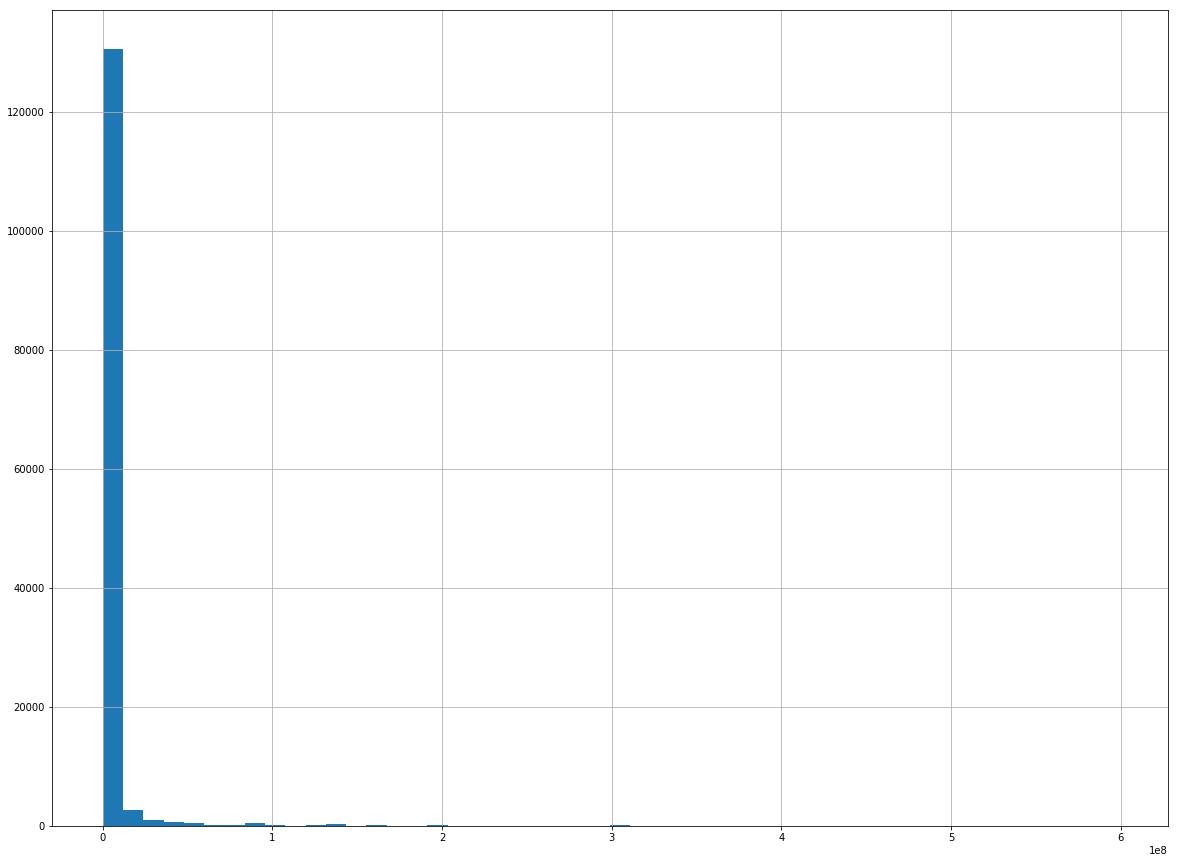

In [33]:
housing["valeur_fonciere"].hist(bins=50, figsize=(20, 15))

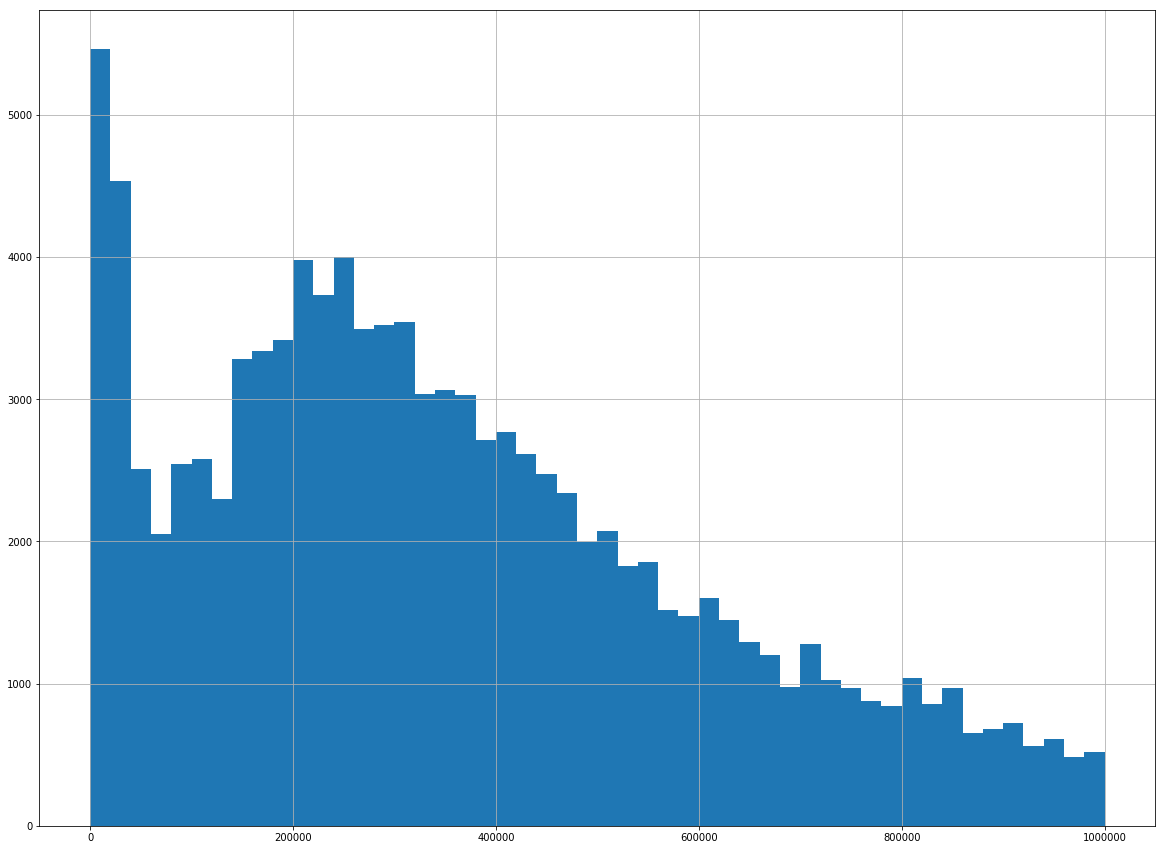

In [34]:
housing["valeur_fonciere"][housing["valeur_fonciere"] < 1000000].hist(bins=50, figsize=(20, 15))

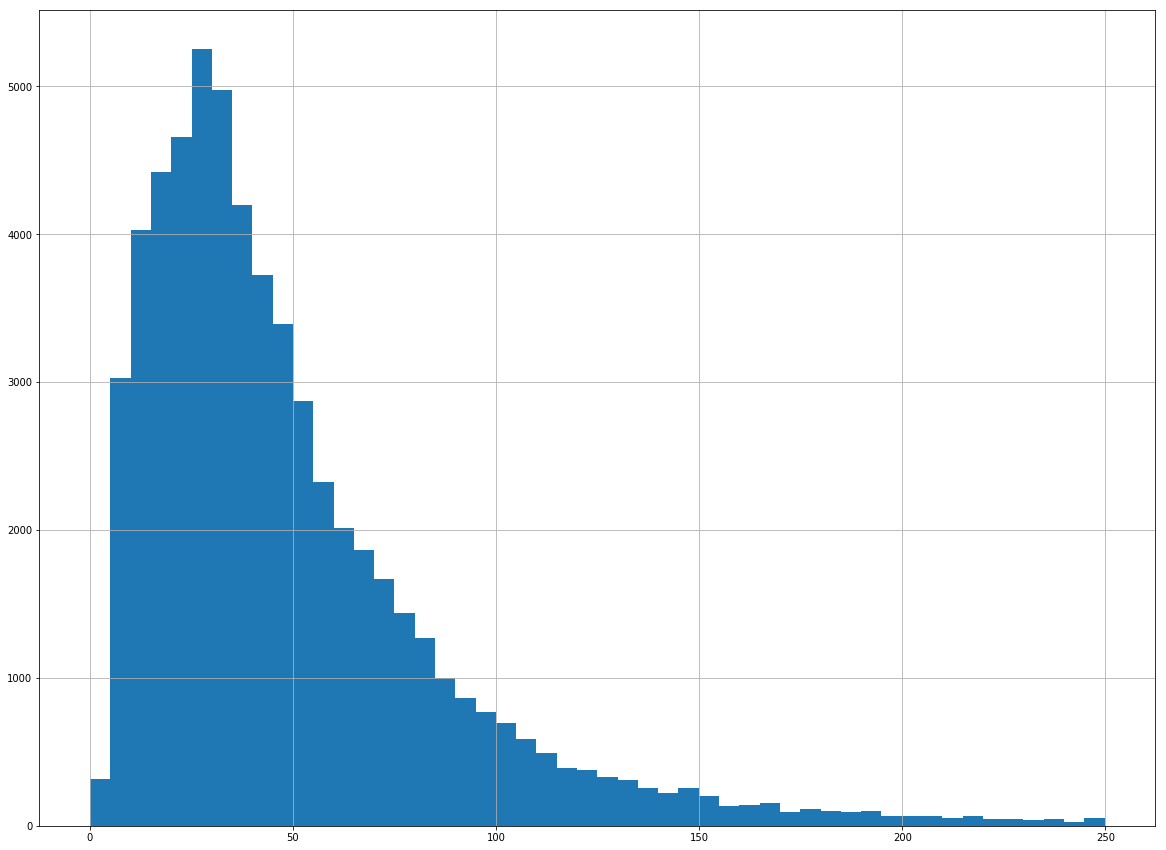

In [35]:
housing["lot1_surface_carrez"][housing["lot1_surface_carrez"] < 250].hist(bins=50, figsize=(20, 15))

30342.43606415258


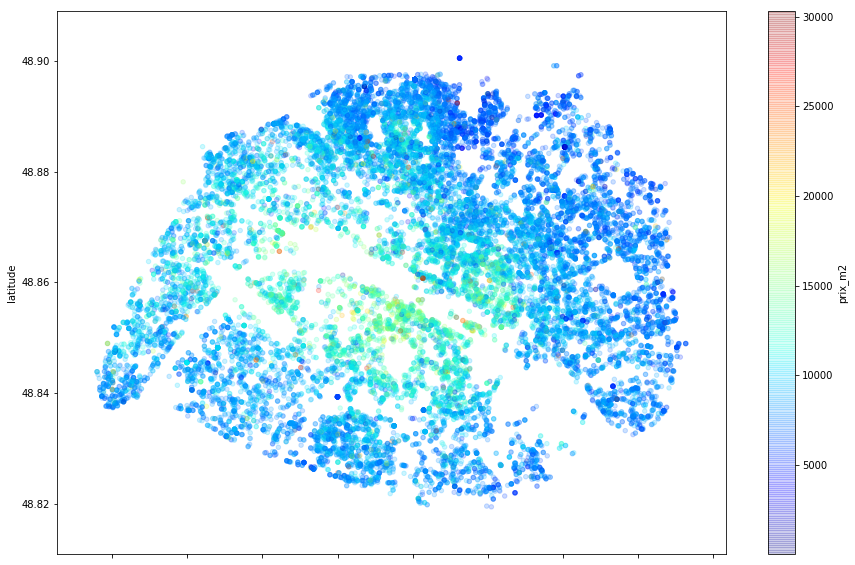

In [71]:

# keep "Vente" only  
h = housing[housing['nature_mutation'] == 'Vente']

# keep "Appartement" only
h = h[h['type_local'] == 'Appartement']

# keep vente with one lot only  
h = h[h['nombre_lots'] == 1]


mean = h['valeur_fonciere'].mean()
std = h['valeur_fonciere'].std()
#h = h[h['valeur_fonciere'] < 3000000]
h = h[np.abs(h['valeur_fonciere'] - mean) <= 1.3*std]

h['prix_m2'] = h['valeur_fonciere'] / h['lot1_surface_carrez']

# remove outliers 
mean = h['prix_m2'].mean()
std = h['prix_m2'].std()
h = h[np.abs(h['prix_m2'] - mean) <= 1.6*std]
print(h['prix_m2'].max())

h.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(15, 10), c="prix_m2", cmap=plt.get_cmap("jet"), colorbar=True)

In [76]:
pd.to_datetime(housing['date_mutation'], infer_datetime_format=True).map(lambda x: x.year)
               
               
#.map(lambda x: x.year)

5177    2016
3283    2017
136     2017
431     2016
358     2016
1071    2016
41      2018
2712    2017
801     2017
2243    2018
2066    2017
962     2017
1803    2016
339     2018
81      2018
143     2016
1867    2017
3494    2017
314     2018
1074    2016
770     2018
3824    2016
3664    2017
4310    2016
4776    2016
1356    2018
3150    2016
1036    2018
2243    2018
2245    2016
        ... 
82      2016
1755    2018
1035    2018
132     2018
1848    2017
3782    2018
8       2018
2274    2018
2675    2017
634     2017
583     2016
1086    2017
683     2017
109     2016
981     2017
1801    2017
1163    2016
1048    2016
3       2018
4178    2017
1812    2017
5066    2018
2536    2018
306     2016
1719    2017
1310    2017
973     2017
1332    2018
1298    2018
3389    2017
Name: date_mutation, Length: 137596, dtype: int64